In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 10)
!date

%load_ext autoreload
%autoreload 2

Thu Sep 26 14:04:11 PDT 2019


# Expert priors in DisMod-MR

Take a look at some of the expert priors for the age-specific rate model in DisMod-MR.

In [2]:
# if dismod_mr is not installed, it should possible to use
# !conda install --yes pymc
# !pip install dismod_mr

In [3]:
import dismod_mr

# Fit with no data

Let's start with a model with no data, to see the default prior.

In [4]:
from IPython.core.pylabtools import figsize
figsize(11, 5.5)

finding initial values


/ihme/homes/abie/projects/2019/dismod_mr/src/dismod_mr/model/priors.py:123: RuntimeWarning: divide by zero encountered in log
  lower=np.log(model.parameters[name]['level_bounds']['lower']),
/homes/abie/.conda/envs/dismod_mr/lib/python3.6/site-packages/pymc/NormalApproximation.py:380: RuntimeWarning: divide by zero encountered in log
  self.data_len) - 2. * lnL  # k ln(n) - 2 ln(L)


. 

/homes/abie/.conda/envs/dismod_mr/lib/python3.6/site-packages/pymc/NormalApproximation.py:380: RuntimeWarning: invalid value encountered in double_scalars
  self.data_len) - 2. * lnL  # k ln(n) - 2 ln(L)


. . 
finding MAP estimate

finding step covariances estimate

resetting initial values (1)
. . . 
resetting initial values (2)

sampling from posterior



/ihme/homes/abie/projects/2019/dismod_mr/src/dismod_mr/model/priors.py:126: RuntimeWarning: divide by zero encountered in log
  log_mu_min = np.log(mu.min())
/ihme/homes/abie/projects/2019/dismod_mr/src/dismod_mr/model/priors.py:143: RuntimeWarning: invalid value encountered in double_scalars
  lower_violation = min(0., log_mu_min - lower)


CPU times: user 5min 14s, sys: 22 s, total: 5min 36s
Wall time: 5min 5s


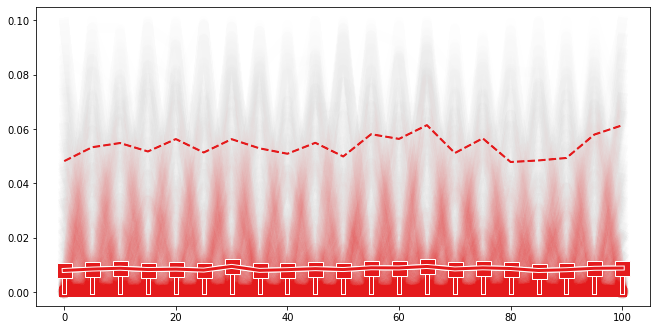

In [5]:
dm = dismod_mr.data.ModelData()

dm.set_level_bounds('p', lower=0, upper=.1)

dm.setup_model('p')

%time dm.fit(how='mcmc', iter=20_000, burn=10_000, thin=10)

dm.plot()

finding initial values
. . . 
finding MAP estimate

finding step covariances estimate

resetting initial values (1)
. . . 
resetting initial values (2)

sampling from posterior

CPU times: user 35.7 s, sys: 32 ms, total: 35.8 s
Wall time: 35.7 s


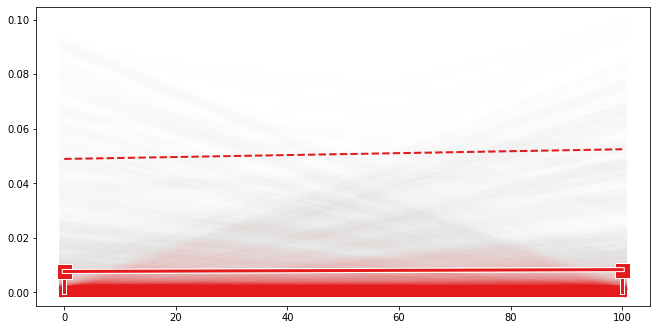

In [6]:
dm = dismod_mr.data.ModelData()

dm.set_level_bounds('p', lower=0, upper=.1)
dm.set_knots('p', [0,100])

dm.setup_model('p')

%time dm.fit(how='mcmc', iter=20_000, burn=10_000, thin=10)

dm.plot()

finding initial values
. . . 
finding MAP estimate

finding step covariances estimate

resetting initial values (1)
. . . 
resetting initial values (2)

sampling from posterior

CPU times: user 37.7 s, sys: 20 ms, total: 37.7 s
Wall time: 37.7 s


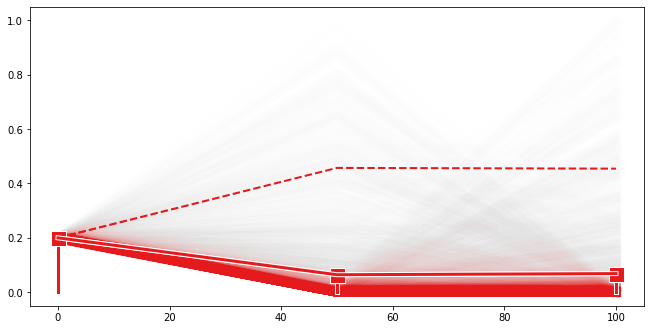

In [7]:
dm = dismod_mr.data.ModelData()

dm.set_level_bounds('p', lower=0, upper=1)
dm.set_level_value('p', age_before=1, age_after=100, value=.2)
dm.set_knots('p', [0, 50, 100])

dm.setup_model('p')

%time dm.fit(how='mcmc', iter=20_000, burn=10_000, thin=10)

dm.plot()

finding initial values
. . . 
finding MAP estimate

finding step covariances estimate

resetting initial values (1)
. . . 
resetting initial values (2)

sampling from posterior

CPU times: user 41.9 s, sys: 36 ms, total: 41.9 s
Wall time: 41.9 s


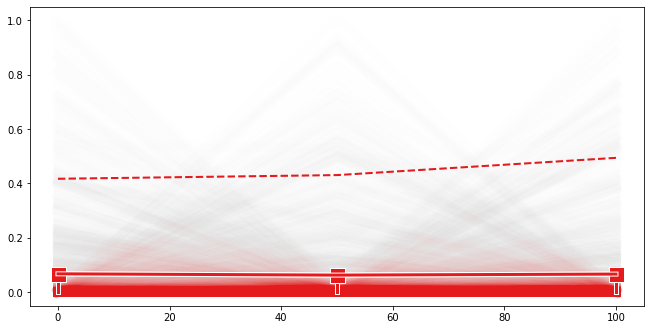

In [8]:
dm = dismod_mr.data.ModelData()

dm.set_level_bounds('p', lower=0, upper=1)
dm.set_knots('p', [0, 50, 100])
dm.set_increasing('p', age_start=0, age_end=100)  # FIXME: seems like this isn't working

dm.setup_model('p')

%time dm.fit(how='mcmc', iter=20_000, burn=10_000, thin=10)

dm.plot()



In [9]:
!date

Thu Sep 26 14:11:42 PDT 2019
